<a href="https://colab.research.google.com/github/kojikoji19780303/Cry_baby/blob/master/DAY5_%E5%B0%8F%E9%BA%A6%E3%81%A8%E3%83%81%E3%82%A7%E3%82%B9%E5%95%8F%E9%A1%8C%EF%BC%BF%E8%AA%B2%E9%A1%8C%E6%8F%90%E5%87%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
n_squares = 4
small_board_list = [1]
for n in range(n_squares - 1 ):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [27]:
# このリストにnp.array()を使うことで、ndarrayを作成することができます。
import numpy as np
small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


【問題1】
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。サンプルコードで作成したndarrayのshapeの変形を行ってください。

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [30]:
square_size = (2, 2)
small_board_ndarray = small_board_ndarray.reshape(square_size)
print("2×2マスのチェス盤：\n{}".format(small_board_ndarray))

2×2マスのチェス盤：
[[1 2]
 [4 8]]


【問題2】
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

In [31]:
def chess_board(square_size=(8, 8)):
    n_squares = square_size[0]*square_size[1]
    board_list = [1]
    for _ in range(n_squares - 1):
        board_list.append(2*board_list[-1])
    board_ndarray = np.array(board_list).reshape(square_size)
    return board_ndarray

square_size = (8, 8)
board_ndarray = chess_board(square_size=square_size)

np.set_printoptions(precision=1) # ndarrayを出力する際の桁数を指定し見やすくする
print("{}マスのチェス盤：\n{}".format(square_size, board_ndarray))

(8, 8)マスのチェス盤：
[[1.0e+00 2.0e+00 4.0e+00 8.0e+00 1.6e+01 3.2e+01 6.4e+01 1.3e+02]
 [2.6e+02 5.1e+02 1.0e+03 2.0e+03 4.1e+03 8.2e+03 1.6e+04 3.3e+04]
 [6.6e+04 1.3e+05 2.6e+05 5.2e+05 1.0e+06 2.1e+06 4.2e+06 8.4e+06]
 [1.7e+07 3.4e+07 6.7e+07 1.3e+08 2.7e+08 5.4e+08 1.1e+09 2.1e+09]
 [4.3e+09 8.6e+09 1.7e+10 3.4e+10 6.9e+10 1.4e+11 2.7e+11 5.5e+11]
 [1.1e+12 2.2e+12 4.4e+12 8.8e+12 1.8e+13 3.5e+13 7.0e+13 1.4e+14]
 [2.8e+14 5.6e+14 1.1e+15 2.3e+15 4.5e+15 9.0e+15 1.8e+16 3.6e+16]
 [7.2e+16 1.4e+17 2.9e+17 5.8e+17 1.2e+18 2.3e+18 4.6e+18 9.2e+18]]


【問題3】小麦の数の合計
8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。

(8, 8)マスのチェス盤の小麦の合計：1.8e+19


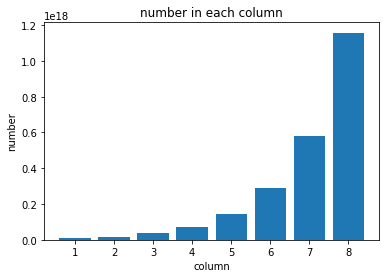

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

square_size = (8, 8)
board_ndarray = chess_board(square_size=square_size)

sum_board = board_ndarray.sum()
mean_board_columns = board_ndarray.mean(axis=0)

print("{}マスのチェス盤の小麦の合計：{:.1e}".format(square_size, sum_board))

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), mean_board_columns)
plt.show()

In [ ]:
【問題4】小麦の数のヒートマップ

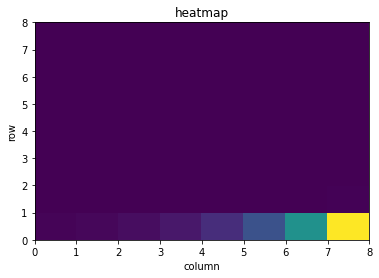

In [34]:
square_size = (8, 8)
board_ndarray = chess_board(square_size=square_size)

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(board_ndarray[::-1]) # スライシングで上下を反転させた
plt.show()

【問題5】
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

In [35]:
square_size = (8, 8)
board_ndarray = chess_board(square_size=square_size)

first_half = board_ndarray[:4, :].sum()
second_half = board_ndarray[4:, :].sum()

rate = second_half/first_half

print("後半は前半の{}倍".format(rate))

後半は前半の4294967296.0倍


6.他の計算方法

In [36]:
def chess_board_with_npappend(square_size=(8, 8)):
    n_squares = square_size[0]*square_size[1]
    board_ndarray = np.array([1]).astype(np.uint64)
    times = np.array([2]).astype(np.uint64)
    for _ in range(n_squares - 1):
        board_ndarray = np.append(board_ndarray, times*board_ndarray[-1])
    board_ndarray = board_ndarray.reshape(square_size)
    return board_ndarray

square_size = (8, 8)
board_ndarray = chess_board_with_npappend(square_size=square_size)

print("{}マスのチェス盤：\n{}".format(square_size, board_ndarray))

(8, 8)マスのチェス盤：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     

In [37]:
def chess_board_with_broadcast(square_size=(8, 8)):

    n_squares = square_size[0]*square_size[1]
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    board_ndarray = board_ndarray.reshape(square_size)
    return board_ndarray

square_size = (8, 8)
board_ndarray = chess_board_with_broadcast(square_size=square_size)

print("{}マスのチェス盤：\n{}".format(square_size, board_ndarray))

(8, 8)マスのチェス盤：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     

【問題7】計算時間の比較

In [38]:
square_size = (8, 8)

In [39]:
%%timeit
board_ndarray = chess_board(square_size=square_size)

The slowest run took 10.71 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 19.5 µs per loop


In [40]:
%%timeit
board_ndarray = chess_board_with_npappend(square_size=square_size)

The slowest run took 9.13 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 435 µs per loop


In [41]:
%%timeit
board_ndarray = chess_board_with_broadcast(square_size=square_size)

The slowest run took 206.04 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 4.29 µs per loop


In [42]:
square_size = (2, 2)

In [43]:
%%timeit
board_ndarray = chess_board(square_size=square_size)

The slowest run took 12.56 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.06 µs per loop


In [44]:
%%timeit
board_ndarray = chess_board_with_npappend(square_size=square_size)

The slowest run took 6.97 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 27.1 µs per loop


In [45]:
%%timeit
board_ndarray = chess_board_with_broadcast(square_size=square_size)

The slowest run took 23.48 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 3.88 µs per loop
